In [1]:
import pandas as pd
import yfinance as yf
from datetime import timedelta
import pandas_ta as ta


In [2]:
tickers = ['TSLA', 'RIVN', 'NVDA','AAPL']
years = 5

In [3]:
def data_download_daily(tickers, years):
    today = pd.Timestamp.today()
    days_in_years = 365*years
    start_date = (today - timedelta(days=days_in_years)).strftime('%Y-%m-%d')
    end_date = today
    days_in_years = 365*years
    prices_df = pd.DataFrame()
    for ticker in tickers:
        data = yf.download(ticker, start = start_date, end= end_date, interval='1D')
        prices_df[ticker] = data['Adj Close']
    return prices_df


In [4]:
prices_df = data_download_daily(tickers=tickers, years=years)
prices_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,RIVN,NVDA,AAPL
Date,,,,
2019-03-07 00:00:00-05:00,18.439333,NaN,37.063309,41.516384
2019-03-08 00:00:00-05:00,18.942667,NaN,37.405991,41.615063
2019-03-11 00:00:00-04:00,19.394667,NaN,40.013283,43.056709
2019-03-12 00:00:00-04:00,18.890667,NaN,40.355957,43.540466
2019-03-13 00:00:00-04:00,19.264000,NaN,41.870663,43.733002
...,...,...,...,...
2024-02-28 00:00:00-05:00,202.039993,11.300,776.630005,181.419998
2024-02-29 00:00:00-05:00,201.880005,11.320,791.119995,180.750000
2024-03-01 00:00:00-05:00,202.639999,11.350,822.789978,179.660004


In [5]:
def calculate_my_strategy(input_df):
    strat = input_df.copy()
    for ticker in input_df.columns:
        strat[ticker + '_upper_50'] =   strat[ticker].rolling(window = 45).mean() + abs(strat[ticker].rolling(window = 90).mean())*0.5
        strat[ticker + '_lower_50'] =   strat[ticker].rolling(window = 45).mean() - abs(strat[ticker].rolling(window = 90).mean())*0.5
        strat[ticker + '_rolling_50'] = strat[ticker].rolling(window = 50).mean()
    return strat

In [6]:
my_strat = calculate_my_strategy(prices_df)
my_strat

,TSLA,RIVN,NVDA,AAPL,TSLA_upper_50,TSLA_lower_50,TSLA_rolling_50,RIVN_upper_50,RIVN_lower_50,RIVN_rolling_50,NVDA_upper_50,NVDA_lower_50,NVDA_rolling_50,AAPL_upper_50,AAPL_lower_50,AAPL_rolling_50
Date,,,,,,,,,,,,,,,,
2019-03-07 00:00:00-05:00,18.439333,NaN,37.063309,41.516384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-08 00:00:00-05:00,18.942667,NaN,37.405991,41.615063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-11 00:00:00-04:00,19.394667,NaN,40.013283,43.056709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-12 00:00:00-04:00,18.890667,NaN,40.355957,43.540466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-13 00:00:00-04:00,19.264000,NaN,41.870663,43.733002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28 00:00:00-05:00,202.039993,11.300,776.630005,181.419998,320.541055,100.124277,214.5882,25.544000,8.155556,17.5196,893.727454,350.676989,609.116399,280.152139,93.856228,187.876989
2024-02-29 00:00:00-05:00,201.880005,11.320,791.119995,180.750000,319.314000,99.099778,213.5558,25.247333,7.923778,17.2894,902.513160,355.349950,615.160799,279.903978,93.544243,187.545625
2024-03-01 00:00:00-05:00,202.639999,11.350,822.789978,179.660004,318.062722,97.952389,212.5670,24.945500,7.681611,17.0404,912.118472,360.411303,621.601199,279.652042,93.212002,187.226018


In [7]:
#input dataframe has to have tickers and column names whoch contain daily pices 
def calculate_donchian(prices_df):
    donchian_df = pd.DataFrame(index=prices_df.index)  # DataFrame to store Donchian channels
    for ticker in prices_df.columns:
        donchian_df[[f"{ticker}_dcl",f"{ticker}_dcm", f"{ticker}_dcu"]] = prices_df.ta.donchian(high = prices_df[ticker], low = prices_df[ticker], lower_length = 40, upper_length = 40)
        donchian_df[f'{ticker}_upper_dcu'] = donchian_df[f'{ticker}_dcu'] - (donchian_df[f'{ticker}_dcu'] - donchian_df[f'{ticker}_dcm'])*0.35
        donchian_df[f'{ticker}_lower_dcl'] = donchian_df[f'{ticker}_dcl'] + (donchian_df[f'{ticker}_dcm'] - donchian_df[f'{ticker}_dcl'])*0.35

    return donchian_df

In [8]:
donchian_df = calculate_donchian(prices_df)
donchian_df.tail(5)

,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl,RIVN_dcl,RIVN_dcm,RIVN_dcu,RIVN_upper_dcu,RIVN_lower_dcl,NVDA_dcl,NVDA_dcm,NVDA_dcu,NVDA_upper_dcu,NVDA_lower_dcl,AAPL_dcl,AAPL_dcm,AAPL_dcu,AAPL_upper_dcu,AAPL_lower_dcl
Date,,,,,,,,,,,,,,,,,,,,
2024-02-28 00:00:00-05:00,181.059998,214.739998,248.419998,234.947998,194.531998,10.07,15.585,21.10,18.894,12.276,475.690002,633.304993,790.919983,727.873987,538.735999,180.949097,187.940178,194.931259,192.134827,183.745529
2024-02-29 00:00:00-05:00,181.059998,210.754997,240.449997,228.571997,192.937997,10.07,15.195,20.32,18.270,12.120,475.690002,633.404999,791.119995,728.033997,538.776001,180.750000,187.840630,194.931259,192.095007,183.586252
2024-03-01 00:00:00-05:00,181.059998,210.754997,240.449997,228.571997,192.937997,10.07,14.825,19.58,17.678,11.972,479.980011,651.384995,822.789978,754.227985,548.542004,179.660004,187.295631,194.931259,191.877008,182.714255
2024-03-04 00:00:00-05:00,181.059998,210.754997,240.449997,228.571997,192.937997,10.07,14.825,19.58,17.678,11.972,490.970001,671.669998,852.369995,780.089996,563.250000,175.100006,185.015633,194.931259,190.965009,179.066257
2024-03-05 00:00:00-05:00,181.059998,210.754997,240.449997,228.571997,192.937997,10.07,14.825,19.58,17.678,11.972,522.530029,687.450012,852.369995,786.402002,588.498022,170.100006,182.515633,194.931259,189.965009,175.066257


In [9]:
prices_df

,TSLA,RIVN,NVDA,AAPL
Date,,,,
2019-03-07 00:00:00-05:00,18.439333,NaN,37.063309,41.516384
2019-03-08 00:00:00-05:00,18.942667,NaN,37.405991,41.615063
2019-03-11 00:00:00-04:00,19.394667,NaN,40.013283,43.056709
2019-03-12 00:00:00-04:00,18.890667,NaN,40.355957,43.540466
2019-03-13 00:00:00-04:00,19.264000,NaN,41.870663,43.733002
...,...,...,...,...
2024-02-28 00:00:00-05:00,202.039993,11.300,776.630005,181.419998
2024-02-29 00:00:00-05:00,201.880005,11.320,791.119995,180.750000
2024-03-01 00:00:00-05:00,202.639999,11.350,822.789978,179.660004


In [10]:
prices_df[(prices_df.index > '2021-11-01') & (prices_df.index < '2021-12-01')]['RIVN']

Date
2021-11-02 00:00:00-04:00           NaN
2021-11-03 00:00:00-04:00           NaN
2021-11-04 00:00:00-04:00           NaN
2021-11-05 00:00:00-04:00           NaN
2021-11-08 00:00:00-05:00           NaN
2021-11-09 00:00:00-05:00           NaN
2021-11-10 00:00:00-05:00    100.730003
2021-11-11 00:00:00-05:00    122.989998
2021-11-12 00:00:00-05:00    129.949997
2021-11-15 00:00:00-05:00    149.360001
2021-11-16 00:00:00-05:00    172.009995
2021-11-17 00:00:00-05:00    146.070007
2021-11-18 00:00:00-05:00    123.379997
2021-11-19 00:00:00-05:00    128.600006
2021-11-22 00:00:00-05:00    118.110001
2021-11-23 00:00:00-05:00    119.849998
2021-11-24 00:00:00-05:00    114.849998
2021-11-26 00:00:00-05:00    112.129997
2021-11-29 00:00:00-05:00    119.769997
2021-11-30 00:00:00-05:00    119.760002
Name: RIVN, dtype: float64

In [11]:
def backtest(reference, ticker, trades):
    max_drawdown=0
    longest_hold=0
    shortest_hold=0
    average_drawdown=0
    max_gain=0
    total_gain= 0

My strategy

In [12]:
merge = pd.merge(prices_df, donchian_df, how='left', left_index=True, right_index=True)
merge

,TSLA,RIVN,NVDA,AAPL,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl,RIVN_dcl,...,NVDA_dcl,NVDA_dcm,NVDA_dcu,NVDA_upper_dcu,NVDA_lower_dcl,AAPL_dcl,AAPL_dcm,AAPL_dcu,AAPL_upper_dcu,AAPL_lower_dcl
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-07 00:00:00-05:00,18.439333,NaN,37.063309,41.516384,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-08 00:00:00-05:00,18.942667,NaN,37.405991,41.615063,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-11 00:00:00-04:00,19.394667,NaN,40.013283,43.056709,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-12 00:00:00-04:00,18.890667,NaN,40.355957,43.540466,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-13 00:00:00-04:00,19.264000,NaN,41.870663,43.733002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28 00:00:00-05:00,202.039993,11.300,776.630005,181.419998,181.059998,214.739998,248.419998,234.947998,194.531998,10.07,...,475.690002,633.304993,790.919983,727.873987,538.735999,180.949097,187.940178,194.931259,192.134827,183.745529
2024-02-29 00:00:00-05:00,201.880005,11.320,791.119995,180.750000,181.059998,210.754997,240.449997,228.571997,192.937997,10.07,...,475.690002,633.404999,791.119995,728.033997,538.776001,180.750000,187.840630,194.931259,192.095007,183.586252
2024-03-01 00:00:00-05:00,202.639999,11.350,822.789978,179.660004,181.059998,210.754997,240.449997,228.571997,192.937997,10.07,...,479.980011,651.384995,822.789978,754.227985,548.542004,179.660004,187.295631,194.931259,191.877008,182.714255


In [13]:
merge[(merge.index > '2021-11-01') & (merge.index < '2021-12-01')]['RIVN']

Date
2021-11-02 00:00:00-04:00           NaN
2021-11-03 00:00:00-04:00           NaN
2021-11-04 00:00:00-04:00           NaN
2021-11-05 00:00:00-04:00           NaN
2021-11-08 00:00:00-05:00           NaN
2021-11-09 00:00:00-05:00           NaN
2021-11-10 00:00:00-05:00    100.730003
2021-11-11 00:00:00-05:00    122.989998
2021-11-12 00:00:00-05:00    129.949997
2021-11-15 00:00:00-05:00    149.360001
2021-11-16 00:00:00-05:00    172.009995
2021-11-17 00:00:00-05:00    146.070007
2021-11-18 00:00:00-05:00    123.379997
2021-11-19 00:00:00-05:00    128.600006
2021-11-22 00:00:00-05:00    118.110001
2021-11-23 00:00:00-05:00    119.849998
2021-11-24 00:00:00-05:00    114.849998
2021-11-26 00:00:00-05:00    112.129997
2021-11-29 00:00:00-05:00    119.769997
2021-11-30 00:00:00-05:00    119.760002
Name: RIVN, dtype: float64

1. if lower donchian indicator is crossed from bottom hold until it crosses donchian upper indicator
2. if upper donchian indicator is crossed from the top, hold until its crossed from below the lower donchian indicator 

long position column where it says true if open position is opened

short position column where it says true if short postion is opened 

obviously both of them are opened as long as they are not closed 

for my case when one is closed second is opened

longest position is when you have the most consecutive true values for either of those columns

biggest drawdown is when you have the biggest difference form the last highest position in the position, if it dips after peaking during long position or peaks after dipin during a short position

average drawdown is sum of all drawdowns devided by the sum of drawdowns (non 0 values in drawdown column)

max gain and average gain is the opposite of drawdowns

all of these need separate columns

In [14]:
backtest_df = merge.copy()

In [15]:
backtest_df

,TSLA,RIVN,NVDA,AAPL,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl,RIVN_dcl,...,NVDA_dcl,NVDA_dcm,NVDA_dcu,NVDA_upper_dcu,NVDA_lower_dcl,AAPL_dcl,AAPL_dcm,AAPL_dcu,AAPL_upper_dcu,AAPL_lower_dcl
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-07 00:00:00-05:00,18.439333,NaN,37.063309,41.516384,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-08 00:00:00-05:00,18.942667,NaN,37.405991,41.615063,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-11 00:00:00-04:00,19.394667,NaN,40.013283,43.056709,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-12 00:00:00-04:00,18.890667,NaN,40.355957,43.540466,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-13 00:00:00-04:00,19.264000,NaN,41.870663,43.733002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28 00:00:00-05:00,202.039993,11.300,776.630005,181.419998,181.059998,214.739998,248.419998,234.947998,194.531998,10.07,...,475.690002,633.304993,790.919983,727.873987,538.735999,180.949097,187.940178,194.931259,192.134827,183.745529
2024-02-29 00:00:00-05:00,201.880005,11.320,791.119995,180.750000,181.059998,210.754997,240.449997,228.571997,192.937997,10.07,...,475.690002,633.404999,791.119995,728.033997,538.776001,180.750000,187.840630,194.931259,192.095007,183.586252
2024-03-01 00:00:00-05:00,202.639999,11.350,822.789978,179.660004,181.059998,210.754997,240.449997,228.571997,192.937997,10.07,...,479.980011,651.384995,822.789978,754.227985,548.542004,179.660004,187.295631,194.931259,191.877008,182.714255


In [33]:
def donchian_check(tickers, input_df):
    column_1 = '_lower_dcl'
    column_2 = '_upper_dcu'
    backtest_df = input_df.copy()
    for ticker in tickers:
        for date in backtest_df.index:
        # Skip the first date as there is no previous date
            if date == backtest_df.index[0]:
                continue
            
            # Get the index location for the current date
            i = backtest_df.index.get_loc(date)
            
            if backtest_df[ticker].iloc[i-1] < backtest_df[ticker + column_1].iloc[i-1] and backtest_df[ticker].iloc[i] > backtest_df[ticker + column_1].iloc[i]:
                backtest_df.at[date, ticker +'_long_pos'] = 'open_long_position'
                # print(backtest_df[ticker].iloc[i-1], backtest_df[ticker + column_1].iloc[i-1])
                # print(backtest_df[ticker].iloc[i], backtest_df[ticker + column_1].iloc[i])
            elif backtest_df[ticker].iloc[i-1] > backtest_df[ticker + column_2].iloc[i-1] and backtest_df[ticker].iloc[i] < backtest_df[ticker + column_2].iloc[i]:
                backtest_df.at[date, ticker +'_long_pos'] = 'close_long_position'
            if backtest_df[ticker].iloc[i-1] < backtest_df[ticker + column_1].iloc[i-1] and backtest_df[ticker].iloc[i] > backtest_df[ticker + column_1].iloc[i]:
                backtest_df.at[date, ticker + '_short_pos'] = 'close_short_position'
            elif backtest_df[ticker].iloc[i-1] > backtest_df[ticker + column_2].iloc[i-1] and backtest_df[ticker].iloc[i] < backtest_df[ticker + column_2].iloc[i]:
                backtest_df.at[date, ticker + '_short_pos'] = 'open_short_position'
    return backtest_df

In [34]:
donchian_df = donchian_check(tickers, backtest_df)
donchian_df

16.273332595825195 16.37133369445801
17.00200080871582 16.37133369445801
13.105999946594238 13.225865936279297
13.729999542236328 13.225865936279297
14.662667274475098 15.032533645629883
15.121999740600586 15.032533645629883
14.780667304992676 14.806399917602539
15.040666580200195 14.806399917602539
14.711999893188477 14.806399917602539
15.305333137512207 14.806399917602539
28.952667236328125 31.497332763671874
33.66666793823242 31.497332763671874
30.29800033569336 31.497332763671874
32.000667572021484 31.497332763671874
232.94667053222656 235.34466552734375
247.33999633789062 235.8566650390625
225.1666717529297 239.006005859375
239.47666931152344 239.006005859375
187.6666717529297 209.006005859375
224.52667236328125 209.006005859375
203.76333618164062 208.3193359375
211.8733367919922 208.3193359375
193.6266632080078 201.07734069824218
202.14666748046875 201.07734069824218
199.68333435058594 201.07734069824218
201.7100067138672 201.07734069824218
199.5933380126953 199.86400451660157
20

,TSLA,RIVN,NVDA,AAPL,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl,RIVN_dcl,...,AAPL_upper_dcu,AAPL_lower_dcl,TSLA_long_pos,TSLA_short_pos,RIVN_long_pos,RIVN_short_pos,NVDA_long_pos,NVDA_short_pos,AAPL_long_pos,AAPL_short_pos
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-07 00:00:00-05:00,18.439333,NaN,37.063309,41.516384,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-08 00:00:00-05:00,18.942667,NaN,37.405991,41.615063,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-11 00:00:00-04:00,19.394667,NaN,40.013283,43.056709,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-12 00:00:00-04:00,18.890667,NaN,40.355957,43.540466,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-13 00:00:00-04:00,19.264000,NaN,41.870663,43.733002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28 00:00:00-05:00,202.039993,11.300,776.630005,181.419998,181.059998,214.739998,248.419998,234.947998,194.531998,10.07,...,192.134827,183.745529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-29 00:00:00-05:00,201.880005,11.320,791.119995,180.750000,181.059998,210.754997,240.449997,228.571997,192.937997,10.07,...,192.095007,183.586252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-01 00:00:00-05:00,202.639999,11.350,822.789978,179.660004,181.059998,210.754997,240.449997,228.571997,192.937997,10.07,...,191.877008,182.714255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
donchian_df[(donchian_df.index > '2021-11-01') & (donchian_df.index < '2021-12-01')]['RIVN']

Date
2021-11-02 00:00:00-04:00           NaN
2021-11-03 00:00:00-04:00           NaN
2021-11-04 00:00:00-04:00           NaN
2021-11-05 00:00:00-04:00           NaN
2021-11-08 00:00:00-05:00           NaN
2021-11-09 00:00:00-05:00           NaN
2021-11-10 00:00:00-05:00    100.730003
2021-11-11 00:00:00-05:00    122.989998
2021-11-12 00:00:00-05:00    129.949997
2021-11-15 00:00:00-05:00    149.360001
2021-11-16 00:00:00-05:00    172.009995
2021-11-17 00:00:00-05:00    146.070007
2021-11-18 00:00:00-05:00    123.379997
2021-11-19 00:00:00-05:00    128.600006
2021-11-22 00:00:00-05:00    118.110001
2021-11-23 00:00:00-05:00    119.849998
2021-11-24 00:00:00-05:00    114.849998
2021-11-26 00:00:00-05:00    112.129997
2021-11-29 00:00:00-05:00    119.769997
2021-11-30 00:00:00-05:00    119.760002
Name: RIVN, dtype: float64

In [19]:
# def create_gains_df(tickers, input_df):
#     gains_df = pd.DataFrame()
#     for ticker in tickers:
#         temporary = input_df[(input_df[f'{ticker}_long_pos'].str.contains('position', na=False)) | 
#                     (input_df[f'{ticker}_short_pos'].str.contains('position', na=False))][[ticker, f'{ticker}_long_pos', f'{ticker}_short_pos']]
#         gains_df = pd.concat([gains_df, temporary])
#     return gains_df

In [20]:
# gains_df = create_gains_df(tickers, donchian_df)
# gains_df

In [21]:
temp_df = donchian_df.filter(regex='TSLA')
temp_df

,TSLA,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl,TSLA_long_pos,TSLA_short_pos
Date,,,,,,,,
2019-03-07 00:00:00-05:00,18.439333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-08 00:00:00-05:00,18.942667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-11 00:00:00-04:00,19.394667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-12 00:00:00-04:00,18.890667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-13 00:00:00-04:00,19.264000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-02-28 00:00:00-05:00,202.039993,181.059998,214.739998,248.419998,234.947998,194.531998,NaN,NaN
2024-02-29 00:00:00-05:00,201.880005,181.059998,210.754997,240.449997,228.571997,192.937997,NaN,NaN
2024-03-01 00:00:00-05:00,202.639999,181.059998,210.754997,240.449997,228.571997,192.937997,NaN,NaN


In [22]:
temporary_df = pd.DataFrame()
temporary_df = donchian_df.filter(regex = 'TSLA')
long_position = False
open_date_long = []
close_date_long = []
open_price_long = []
close_price_long = []
results_long = pd.DataFrame()
results_short = pd.DataFrame()
#create lists of positions to be able to track and summerize them
temporary_df['TSLA_long_pos']  = temporary_df['TSLA_long_pos'].astype(str)
#first calculate long positions
for date, row in temporary_df.iterrows():
        print(date, row)
        if long_position == False and 'open' in row['TSLA_long_pos']:
                open_date_long.append(date)
                open_price_long.append(row['TSLA'])
                long_position = True
        if long_position == True and 'close' in row['TSLA_long_pos']:
                close_date_long.append(date)
                close_price_long.append(row['TSLA'])
                long_position = False

/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_68743/1266625282.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporary_df['TSLA_long_pos']  = temporary_df['TSLA_long_pos'].astype(str)


2019-03-07 00:00:00-05:00 TSLA              18.439333
TSLA_dcl                NaN
TSLA_dcm                NaN
TSLA_dcu                NaN
TSLA_upper_dcu          NaN
TSLA_lower_dcl          NaN
TSLA_long_pos           nan
TSLA_short_pos          NaN
Name: 2019-03-07 00:00:00-05:00, dtype: object
2019-03-08 00:00:00-05:00 TSLA              18.942667
TSLA_dcl                NaN
TSLA_dcm                NaN
TSLA_dcu                NaN
TSLA_upper_dcu          NaN
TSLA_lower_dcl          NaN
TSLA_long_pos           nan
TSLA_short_pos          NaN
Name: 2019-03-08 00:00:00-05:00, dtype: object
2019-03-11 00:00:00-04:00 TSLA              19.394667
TSLA_dcl                NaN
TSLA_dcm                NaN
TSLA_dcu                NaN
TSLA_upper_dcu          NaN
TSLA_lower_dcl          NaN
TSLA_long_pos           nan
TSLA_short_pos          NaN
Name: 2019-03-11 00:00:00-04:00, dtype: object
2019-03-12 00:00:00-04:00 TSLA              18.890667
TSLA_dcl                NaN
TSLA_dcm                NaN

1. can define a function for one and just reapeat for every ticker
2. figure out if i want to return multiple dataframes or find a way to return results for multiple tickers


In [23]:
def bbacktest(tickers, backtest_df):
        results_list = []
        #iterate through tickers
        # Assuming your DataFrame is called 'temporary_df'
        for ticker in tickers:
                temporary_df = pd.DataFrame()
                temporary_df = backtest_df.filter(regex = ticker)
                long_position = False
                open_date_long = []
                close_date_long = []
                open_price_long = []
                close_price_long = []
                results_long = pd.DataFrame()
                results_short = pd.DataFrame()
                #create lists of positions to be able to track and summerize them
                #make sure columns that will be checked are in correct formats
                pos_columns = [col for col in temporary_df.columns if 'pos' in col]
                temporary_df[pos_columns] = temporary_df[pos_columns].astype(str)

                #first calculate long positions
                for date, row in temporary_df.iterrows():
                        if long_position == False and 'open' in row[f'{ticker}_long_pos']:
                                open_date_long.append(date)
                                open_price_long.append(row[ticker])
                                long_position = True
                        if long_position == True and 'close' in row[f'{ticker}_long_pos']:
                                close_date_long.append(date)
                                close_price_long.append(row[ticker])
                                long_position = False
                if len(open_date_long) > len(close_date_long):
                        close_date_long.append(pd.Timestamp.today())
                if len(open_price_long) > len(close_price_long):
                        close_price_long.append(backtest_df[ticker][-1]) 
                results_long = pd.DataFrame({'open_date': open_date_long, 'close_date': close_date_long, 'open_price':open_price_long, 'close_price':close_price_long})
                results_long['gain'] = (results_long['close_price'] - results_long['open_price']) / results_long['open_price']
                results_long['total'] = None
                results_long['position'] = 'Long'

                #repeat for short positions
                short_position = False
                open_date_short  = []
                close_date_short = []
                open_price_short = []
                close_price_short = []
                for date, row in temporary_df.iterrows():
                        if short_position == False and 'open' in row[f'{ticker}_short_pos']:
                                open_date_short.append(date)
                                open_price_short.append(row[ticker])
                                short_position = True
                        if short_position == True and 'close' in row[f'{ticker}_short_pos']:
                                close_date_short.append(date)
                                close_price_short.append(row[ticker])
                                short_position = False
                if len(open_date_short) > len(close_date_short):
                        close_date_short.append(pd.Timestamp.today())
                if len(open_price_short) > len(close_price_short):
                        close_price_short.append(backtest_df[ticker][-1]) 
                results_short = pd.DataFrame({'open_date': open_date_short, 'close_date': close_date_short, 'open_price':open_price_short, 'close_price':close_price_short})
                results_short['gain'] = (results_short['close_price'] - results_short['open_price']) / results_short['open_price']
                results_short['total'] = None
                results_short['position'] = 'Short'
                total_results = pd.concat([results_long, results_short], axis=0)
                total_results = total_results.sort_values(by = 'open_date', ascending=True)
                total_results.reset_index(inplace = True,drop=True)
                for i in range(len(total_results['gain'])):
                        if i == 0:
                                total_results['total'][i] = 100 + total_results['gain'][i] * 100
                        else:
                                total_results['total'][i] = total_results['total'][i-1] + total_results['total'][i-1] * total_results['gain'][i]
                results_list.append(total_results)
        return results_list
#    return total_results
        


naprawic kierunek, ceny i 'tagi' transakcji

!!!!!!!

In [36]:
results = bbacktest(tickers, donchian_df)
results[2]


/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_68743/1958609690.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporary_df[pos_columns] = temporary_df[pos_columns].astype(str)
/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_68743/1958609690.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_results['total'][i] = 100 + total_results['gain'][i] * 100
/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_68743/1958609690.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

,open_date,close_date,open_price,close_price,gain,total,position
0,2019-06-07 00:00:00-04:00,2019-07-31 00:00:00-04:00,36.170898,41.943317,0.159587,115.958738,Long
1,2019-07-31 00:00:00-04:00,2019-08-06 00:00:00-04:00,41.943317,37.873787,-0.097025,104.707897,Short
2,2019-08-06 00:00:00-04:00,2019-09-19 00:00:00-04:00,37.873787,44.030338,0.162554,121.728628,Long
3,2019-09-19 00:00:00-04:00,2020-03-10 00:00:00-04:00,44.030338,65.054825,0.477500,179.854047,Short
4,2020-03-10 00:00:00-04:00,2020-04-21 00:00:00-04:00,65.054825,67.155380,0.032289,185.661355,Long
5,2020-04-21 00:00:00-04:00,2020-12-10 00:00:00-05:00,67.155380,129.430801,0.927333,357.831315,Short
6,2020-12-10 00:00:00-05:00,2021-01-14 00:00:00-05:00,129.430801,131.705673,0.017576,364.120547,Long
7,2021-01-14 00:00:00-05:00,2021-03-09 00:00:00-05:00,131.705673,124.964066,-0.051187,345.482338,Short
8,2021-03-09 00:00:00-05:00,2021-04-20 00:00:00-04:00,124.964066,151.423599,0.211737,418.63378,Long
9,2021-04-20 00:00:00-04:00,2021-10-05 00:00:00-04:00,151.423599,204.203293,0.348557,564.551343,Short


dodac stop loss na 10 lub 15%

In [25]:
rivn = donchian_df.filter(regex='RIVN')


In [26]:
rivn.columns

Index(['RIVN', 'RIVN_dcl', 'RIVN_dcm', 'RIVN_dcu', 'RIVN_upper_dcu',
       'RIVN_lower_dcl', 'RIVN_long_pos', 'RIVN_short_pos'],
      dtype='object')

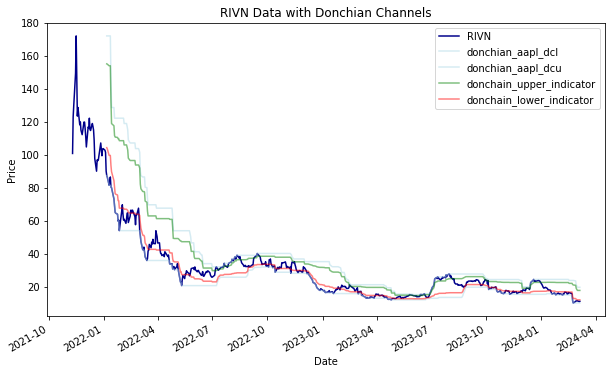

In [27]:
import matplotlib.pyplot as plt

# Plot the graph with customized colors and transparency
rivn_plot = rivn[['RIVN', 'RIVN_dcl', 'RIVN_dcm', 'RIVN_dcu','RIVN_upper_dcu', 'RIVN_lower_dcl']]
#rivnl_plot = aapl_plot[aapl_plot.index >= '2022-01-01']
rivn_plot['RIVN'].plot(color='darkblue', figsize=(10, 6), label='RIVN')
rivn_plot['RIVN_dcl'].plot(color = 'lightblue', label = 'donchian_aapl_dcl', alpha = 0.5)
rivn_plot['RIVN_dcu'].plot(color = 'lightblue', label = 'donchian_aapl_dcu', alpha = 0.5)
rivn_plot['RIVN_upper_dcu'].plot(color = 'green', label = 'donchain_upper_indicator', alpha = 0.5)
rivn_plot['RIVN_lower_dcl'].plot(color = 'red', label = 'donchain_lower_indicator',alpha = 0.5)


# Add legend
plt.legend()

# Add title and labels
plt.title('RIVN Data with Donchian Channels')
plt.xlabel('Date')
plt.ylabel('Price')

# Show the plot
plt.show()


przyjrzeć się kilku caseom z bliska i uleprzyć warunki